# REMOVE BEFORE TURNING THIS IN!!!!!!! - Instructions

<h1><center>Financial Applications of Time Series</center></h1>
<center> David Tran, Frank Sclafani, Matthew Przybyla, and Brandon Hill</center>
<center> MSDS 7333 - Quantifying the World - Case Study 4 (Unit 4)</center>
<center> June 5 2018</center>

# Notebook Navigation

[1) Abstract](#Abstract) 

[2) Introduction](#Introduction)

[3) Methods](#Methods) 

[4) Results](#Results) 

[5) Future Work / Discussion / Conclusions](#Future Work, Discussion Conclusions, and Next Steps) 

[6) References](#References) 

# Abstract

- Using Python libraries to handle financial time series data:
* One of the most time-consuming issues in working with financial data is the so-called data alignment problem. (pg.330)
    * Two related time series may have indexes that don�t line up perfectly, or two DataFrame objects might have columns or row labels that don�t match.
    * pandas take an alternate approach by automatically aligning data in arithmetic operations.
* In this section, I�ll describe a simplified cross-sectional momentum portfolio and show how you might explore a grid of model parameterizations. First, I�ll load historical prices for a portfolio of financial and technology stocks: (pg.345)
    * Cummaltive returns
    * momentum
* Rolling Correlation and Linear Regression (pg. 350)
    


# Introduction

Financial instituions or FIs, such as banks and traders, heavily rely on financial modeling and forecasting in order to create a portfolio or risk recommendations to their clients. The performance and research by financial institutions are limited by their headcount and resources. The data science fields has different models and algorithms that can handle large amounts of financial data and analyze it in order for trend and predictive analysis. For our analysis, we have chosen the Signal Frontier Analysis method. 

The method consist of a simplified cross-sectional momentum portfolio and shows how someone would explore a grid of model parameterizations. The financial stock data came from a Yahoo Finance API. The stocks that were chosen are: Amazon (AMZN), Walmart (WMT), Target (TGT), Best Buy (BBY), and Costco (COST). All of these companies are in the retail industry, such as consumer goods, retail, or electronics. 

The date range of the data set spans 5 years between June 4, 2013 to June 1, 2018. The analysis will be based off of its daily closing price. The analysis will allow to understand and create insight of different trends, correlations, and findings. All of the findings will be explained in the Results down below. 

# Background

The stock market volumes dataset collected via the Yahoo Finance API contains 1,304 observations and 6 variables. There is no missing data within any of the variables across all observations. Our objective is to analyze the historical daily adjusted closing stock prices for 5 major retail companies for the 5-year span between June 4, 2013 and June 1, 2018. A full list of variable descriptions, including the Datetime variable in which the observation was captured and the data is indexed by, can be found in Table 1:

|    Variable   |                                         Description                                         |    Type    |
|:-------------:|:-------------------------------------------------------------------------------------------:|:----------:|
| DatetimeIndex | Date observation was collected. (Index of data)                                             |  Ordinal   |
| AMZN          | Amazon.com, Inc. adjusted close price adjusted for both dividends and   splits.             | Continuous |
| WMT           | Walmart Inc. adjusted close price adjusted for both dividends and splits.                   | Continuous |
| TGT           | Target Corporation adjusted close price adjusted for both dividends and   splits.           | Continuous |
| BBY           | Best Buy Co., Inc. adjusted close price adjusted for both dividends and   splits.           | Continuous |
| COST          | Costco Wholesale Corporation adjusted close price adjusted for both   dividends and splits. | Continuous |

In [2]:
px.describe()

NameError: name 'px' is not defined

In [1]:
px.info()

NameError: name 'px' is not defined

# Methods - Signal Frontier Analysis

In [3]:
# This cell just tells the notebook to set the width of the cells in relation to the screen width
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [4]:
print('Loading globals ...')

import datetime
import pandas as pd
start_dt=datetime.datetime(2013,1,1)
end_dt=datetime.datetime(2018,7,1)
from pandas_datareader import data as web

from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

import warnings
warnings.filterwarnings('ignore')

print('Globals Loaded')

Loading globals ...


ImportError: No module named pandas_datareader

In [18]:
print('')
print('Loading Data')

stock='AMZN'
px=pd.DataFrame({'AMZN':web.DataReader(stock,'iex', start_dt, end_dt)['close']})
names=['WMT','TGT', 'BBY','COST']
for stock in names:
    while True:
        try:
            px[stock]=web.DataReader(stock,'iex', start_dt, end_dt)['close']
            break
        except:
            print('Unable to read stock: {0}'.format(stock))
            print('trying again')
px.index=pd.to_datetime(px.index)

print('File Has Been Loaded')


Loading Data
5y
5y
5y
5y
5y
File Has Been Loaded


http://pandasguide.readthedocs.io/en/latest/Pandas/timeseries.html

A series of time can be generated using �date_range� command. In below code, �periods� is the total number of samples; whereas freq = �M� represents that series must be generated based on �Month�.

By default, pandas consider �M� as end of the month. Use �MS� for start of the month. Similarly, other options are also available for day (�D�), business days (�B�) and hours (�H�) etc.

In [19]:
px = px.asfreq('B').fillna(method='pad')

In [20]:
px

,AMZN,WMT,TGT,BBY,COST
date,,,,,
2013-06-04,265.70,66.3049,60.7427,23.5235,97.3715
2013-06-05,267.17,65.7025,59.6044,23.2574,96.0604
2013-06-06,267.83,66.0343,59.6809,23.7639,97.7498
2013-06-07,276.87,66.6455,59.7658,23.6344,97.3011
2013-06-10,281.07,66.1390,59.3581,24.2218,97.0635
2013-06-11,274.78,65.7025,59.4600,24.0922,96.8083
...,...,...,...,...,...
2018-05-25,1610.15,82.4600,71.2100,68.4500,198.3600
2018-05-28,1610.15,82.4600,71.2100,68.4500,198.3600


In [23]:
plt.close('all')

Plot the Cumulative Returns of  each stock:

In [24]:
import seaborn as sns
sns.set(style="ticks")

Figure Cumulative returns for each of the stocks

In the graph below, all five stocks are compared over the five year period. The most noticeable trend is from AMZN, which is nearly twice the level at the current time as any other stock. Interestingly, the second highest stock, BBY, increases as AMZN does, almost mimicking/paralleling it’s behavior. This event could be indicative of mutual characteristics between the two companies. While COST, WMT, and TGT see overall low returns, relatively, AMZN however does have a precipitous drop at the year 2016. Research suggests this activity could be due to an increase in investment from digital content, such as AWS and Echo.  

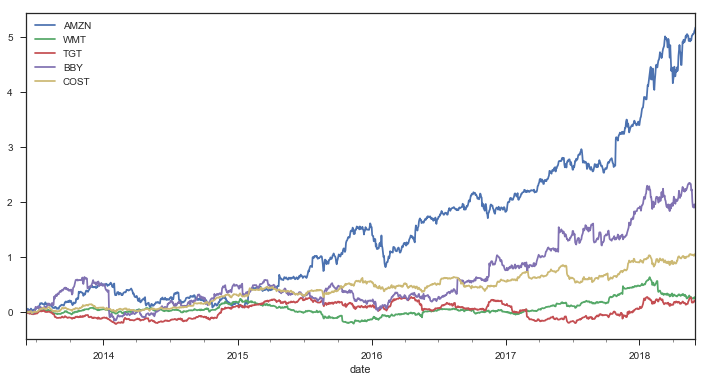

In [25]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()
plt.show()

For the portfolio construction, we'll compute momentum over a certain lookback, then rank in descending order and standardize:

In [26]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

With this transform function in hand, we can set up a strategy backtesting function that computes a portfolio for a particular lookback and holding period (days between trading), returning the overall Sharpe ratio

In [27]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)


When called with the prices and a parameter combination, this function returns a scalar value:

In [28]:
strat_sr(px, 70, 30)

0.04782554320122095

From there, you can evaluate the strat_sr function over a grid of parameters, storing them as you go in a defaultdict and finally putting the results in a DataFrame:

In [29]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

# Results

To visualize the results and get an idea of what is going on, here is a function that uses matplotlib to produce a heatmap with some adornments:

In [30]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

Figure. Heatmap of momentum strategy Sharpe ratio (higher is better) over various lookbacks and holding periods

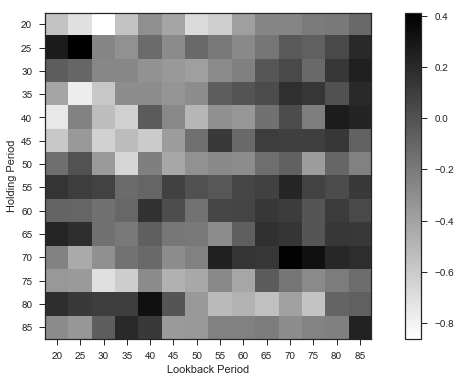

In [31]:
heatmap(ddf)
plt.show()

In finance, holding period return (HPR) is the return on an asset or portfolio over the whole period during which it was held.

Quadrants 1 and 4 have higher sharpe ratios demonstrating that lookback periods greater than 50 days produce a larger return against the risk free return treasury bill. We see that holding periods of between 25 and 75 days tend to perform better combined with a lookback period greater than 50 days.

Quadrant 2 and 3 demonstrate that lookback periods less than 50 days, we see that holding periods of 25, 55-65, and 80 days fare better. 

# Future Work / Discussion / Conclusions

For practical applications of this analysis we will be wise to not blindly accept market strategy results. In our analysis on the dataset in this study, we naturally settled on results that provided the highest return. Also, our strategy assumes that historical success is an indicator of how the stock will perform in the future. As we all know, there of course no way of knowing for sure how the market will perform.During our analysis we used a weight constraint at minimum variance. Our system rebalances the portfolio data once per business day. Future analysis could explore the possibility of longer time periods, such as daily or weekly rebalancing and compare that to see if that provides an additional advantage. Finally, other methods, other than the Sharp Ratio that we chose for this analysis, should be evaluated and compare the constraints using regression comparison analysis.

# References

1. https://www.investopedia.com/terms/s/sharperatio.asp
2. http://money.cnn.com/2016/10/27/technology/amazon-earnings/index.html  
